In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
import warnings
warnings.simplefilter('ignore')

In [2]:
df_base_titanic = pd.read_csv('train.csv')
df_base_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 1º Explorar o dataset
verificar pessoas da mesma familia pelo sobrenome

In [3]:
print(df_base_titanic.shape[0] , 'X' , df_base_titanic.shape[1])

8693 X 14


O dataset tem 8693 linhas e 14 colunas 

In [4]:
df_base_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_base_titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Analisar o quanto da base está com valores faltantes 

In [6]:
df_base_titanic.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
# melhorando este insight, vamos analisar o quanto de dados faltante representa de cada feature
nan_ratio = []
for col in df_base_titanic.columns :
    nan_item = []
    nan_item.append(col)
    nan_item.append(df_base_titanic[col].isnull().sum())
    nan_item.append(str(round(100*df_base_titanic[col].isnull().sum() / df_base_titanic.shape[0], 2 ))+ '%')
    nan_ratio.append(nan_item)
    
df_nan = pd.DataFrame(nan_ratio, columns=["Column", "NaN count", "NaN ratio"]).set_index("Column")
df_nan = df_nan.sort_values("NaN ratio", ascending=False)
df_nan.astype(object).T

Column,CryoSleep,ShoppingMall,VIP,HomePlanet,Name,Cabin,VRDeck,FoodCourt,Spa,Destination,RoomService,Age,PassengerId,Transported
NaN count,217,208,203,201,200,199,188,183,183,182,181,179,0,0
NaN ratio,2.5%,2.39%,2.34%,2.31%,2.3%,2.29%,2.16%,2.11%,2.11%,2.09%,2.08%,2.06%,0.0%,0.0%


### Analisar se a base é desbalanceada

In [8]:
df_base_titanic['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [9]:
df_base_titanic['Transported'] = np.where(df_base_titanic['Transported'] == True, 1, 0)

### Analisar as features e tratar o dados faltante

#### Features categóricas e Booleanas

#1 HomePlanet

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

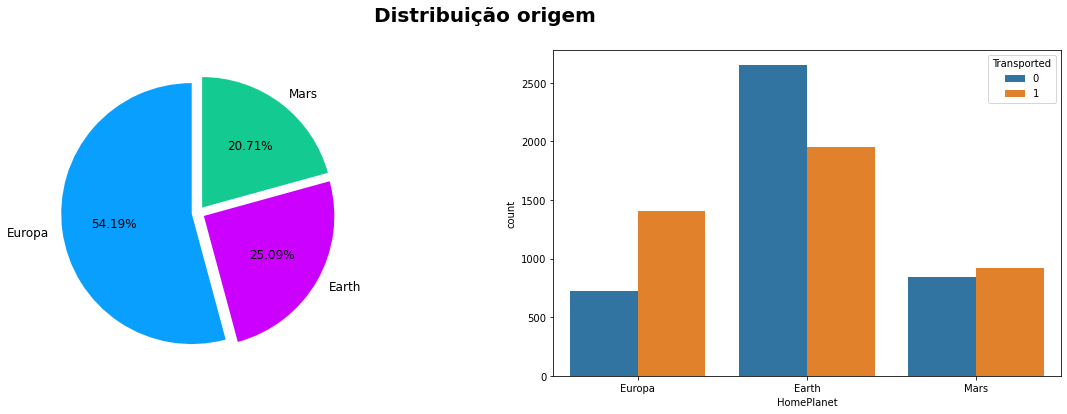

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição origem', size = 20, weight='bold')

sizes = list(df_base_titanic['HomePlanet'].value_counts(sort=False))

labels = df_base_titanic['HomePlanet'].dropna().unique()
colors = ['#099FFF', '#CC00FF', '#13CA91']
explode = (0.05,0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='HomePlanet', data=df_base_titanic, hue='Transported', ax=ax[1])

In [11]:
most_imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'most_frequent')

In [12]:
df_base_titanic.HomePlanet = most_imputer.fit_transform(df_base_titanic[['HomePlanet']])

#2 CryoSleep

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

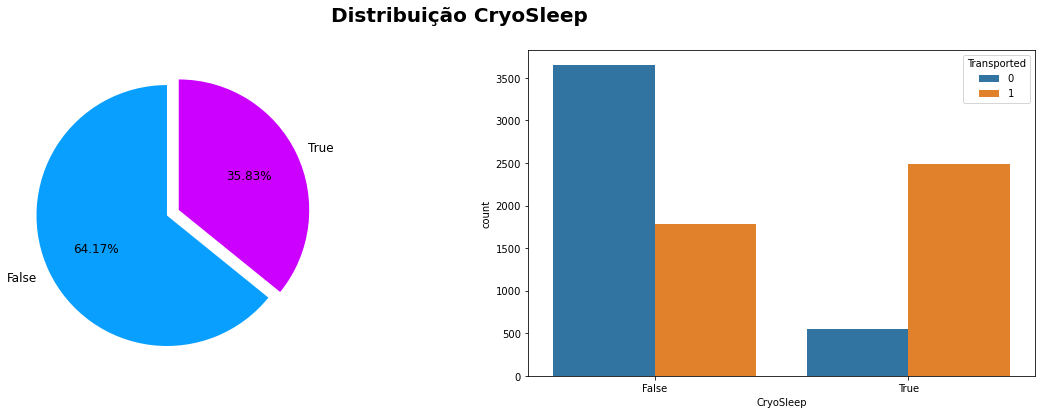

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição CryoSleep', size = 20, weight='bold')

sizes = list(df_base_titanic['CryoSleep'].value_counts())

labels = df_base_titanic['CryoSleep'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='CryoSleep', data=df_base_titanic, hue='Transported', ax=ax[1])

In [14]:
df_base_titanic.CryoSleep = most_imputer.fit_transform(df_base_titanic[['CryoSleep']])

In [15]:
df_base_titanic['CryoSleep'] = np.where(df_base_titanic['VIP'] == True , 1 , 0)

#3 Cabin

In [31]:
# Removendo todas as linhas onde não temos a informção da cabine, já que não podemos assumir nenhum valor para elas.
df_base_titanic = df_base_titanic.dropna(subset = ['Cabin'])

In [59]:
df_base_titanic['Cabin'] = df_base_titanic['Cabin'].astype(str)

In [60]:
df_base_titanic['Cabin'].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [61]:
df_base_titanic['Deck'] = df_base_titanic.loc[df_base_titanic['Cabin'].index].apply(lambda x : x.str.split('/')[0])

AttributeError: Can only use .str accessor with string values!

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Cabin', size = 20, weight='bold')

sizes = list(df_base_titanic['Cabin'].value_counts())

labels = df_base_titanic['Cabin'].dropna().unique()
colors = ['#099FFF', '#CC00FF']
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Cabin', data=df_base_titanic, hue='Transported', ax=ax[1])

#4 Destination

In [16]:
df_base_titanic.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

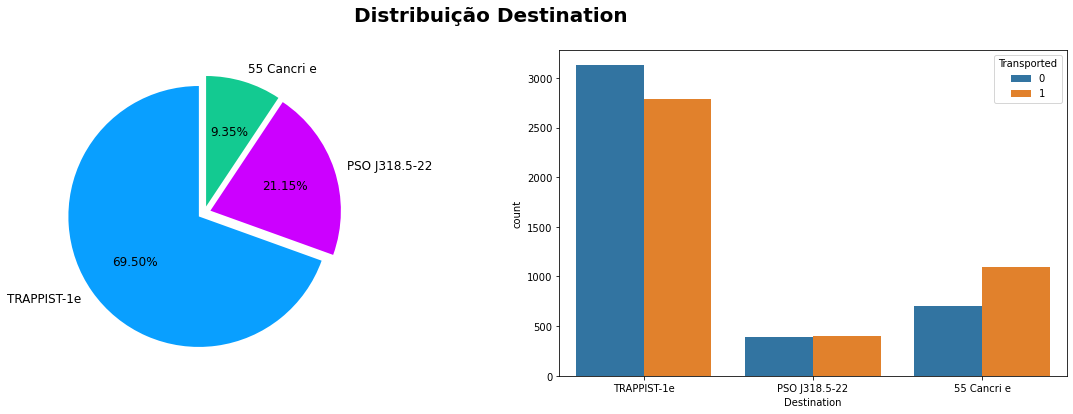

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição Destination', size = 20, weight='bold')

sizes = list(df_base_titanic['Destination'].value_counts())

labels = df_base_titanic['Destination'].dropna().unique()
colors = ['#099FFF', '#CC00FF' , '#13CA91' ]
explode = (0.05,0.05 ,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='Destination', data=df_base_titanic, hue='Transported', ax=ax[1])

In [18]:
df_base_titanic.Destination = most_imputer.fit_transform(df_base_titanic[['Destination']])

#5 VIP

<AxesSubplot:xlabel='VIP', ylabel='count'>

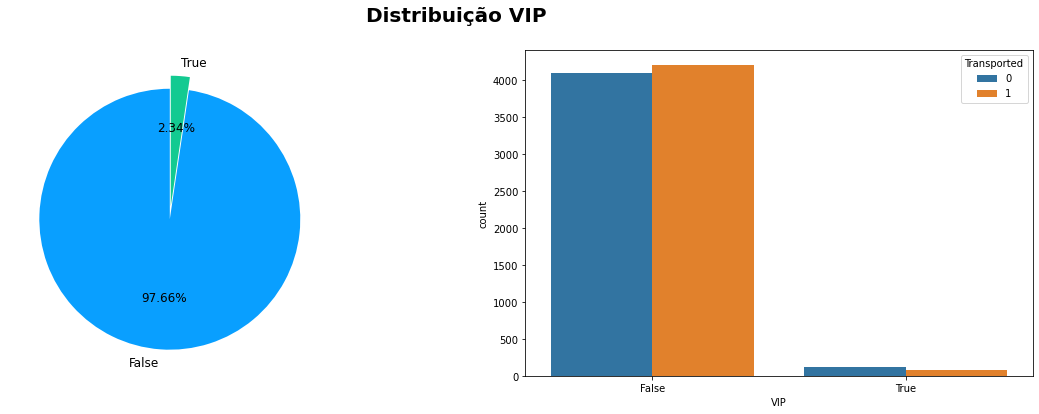

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribuição VIP', size = 20, weight='bold')

sizes = list(df_base_titanic['VIP'].value_counts())

labels = df_base_titanic['VIP'].dropna().unique()
colors = ['#099FFF',  '#13CA91' ]
explode = (0.05,0.05) 

ax[0].pie(sizes, colors=colors, explode=explode, startangle=90, labels=labels,
       autopct='%1.2f%%', pctdistance=0.6,textprops={'fontsize':12})
sns.countplot(x='VIP', data=df_base_titanic, hue='Transported', ax=ax[1])

In [20]:
df_base_titanic.VIP = most_imputer.fit_transform(df_base_titanic[['VIP']])

In [21]:
df_base_titanic['VIP'] = np.where(df_base_titanic['VIP'] == True, 1, 0)